In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Pandas version: 0.23.4
Matplotlib version 3.0.2


In [3]:
np.seed(111)

In [4]:
def CreateDataSet(number=1):
    output = []
    
    for i in range(number):
        # 毎週月曜日の日付データを作成
        rng = pd.date_range(start="1/1/2009",end="12/31/2012",freq="W-MON")
        # 曜日データと同じサイズでランダムなデータの作成
        data= np.randint(low=25,high=1000,size=len(rng))
        # Status pool
        status = [1,2,3]
        # statusに関してのランダムなリストの作成
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        # States pool
        states = ['GA','FL','fl','NY','NJ','TX']
        # statesのランダムなリストを作成
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
        
        output.extend(zip(random_states,random_status,data,rng))
    return output

In [5]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [6]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [7]:
# エクセルで書き出して見る
df.to_excel('lesson3.xlsx',index=False)
print('Done')

Done


In [8]:
# 読み込んで見るd
df = pd.read_excel('./lesson3.xlsx',0,index_col = 'StatusDate')

In [9]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [10]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [12]:
# Stateの重複を取り除いた配列を取得してみる
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [13]:
# apply関数ですべてUpperCaseにしてみる
df['State'] = df.State.apply(lambda x:x.upper())

In [14]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [15]:
# Statusが１のものだけを取得してみる
df[df['Status']==1]

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291
2009-04-27,NJ,1,753
2009-05-25,TX,1,46
2009-07-06,FL,1,723
2009-07-20,FL,1,710


In [16]:
# StateがNJのすべてのレコードをNYにしてみる
df['State'][df['State']=='NJ']='NY'

/home/coly/pylab/myvenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY'], dtype=object)

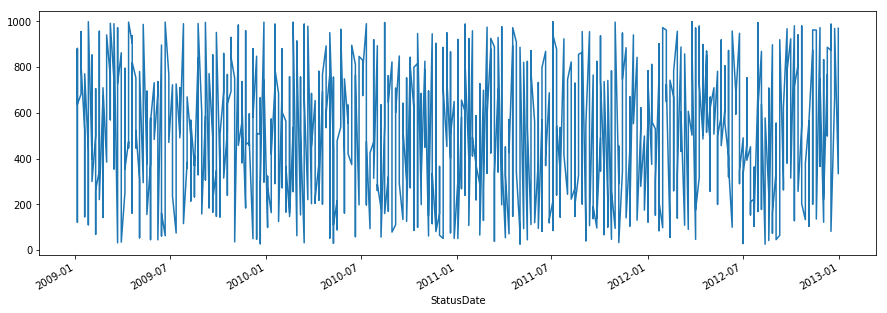

In [22]:
df['CustomerCount'].plot(figsize=(15,5))

In [23]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,2,882
2009-01-19,NY,1,522
2009-01-26,NY,2,999
2009-02-09,NY,2,500
2009-02-23,NY,1,710
2009-03-02,NY,2,385
2009-03-02,NY,3,728
2009-03-02,NY,3,941
2009-03-09,NY,3,606


In [25]:
# 日付の重複があり（取り間違いではなくデータが多かったため２回に分けてとった）
#,またstatusのデータは実は意味がないものだったので取り除きたい場合
daily = df.reset_index().groupby(['State','StatusDate']).sum()
daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-05       6            760
      2009-01-12       7           2538
      2009-01-19       6            895
      2009-01-26       6            547
      2009-02-02       4           1506

In [28]:
# とりあえずStatusは消しておく
del daily['Status']
daily.head()

CustomerCount
State StatusDate               
FL    2009-01-05            760
      2009-01-12           2538
      2009-01-19            895
      2009-01-26            547
      2009-02-02           1506

In [29]:
daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-1

In [30]:
# stateのindexを取得してみる
daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [31]:
# StatusDataのindexを取得してみる
daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=209, freq=None)

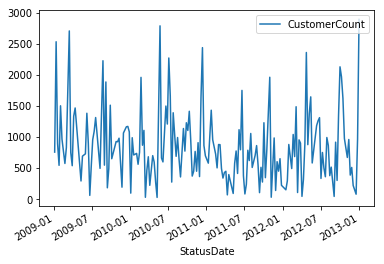

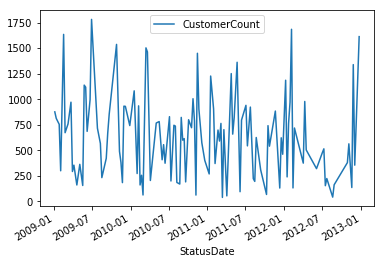

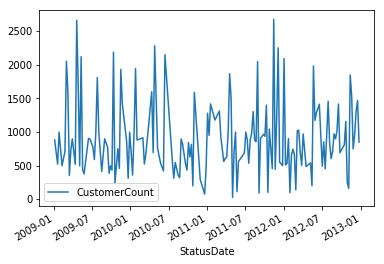

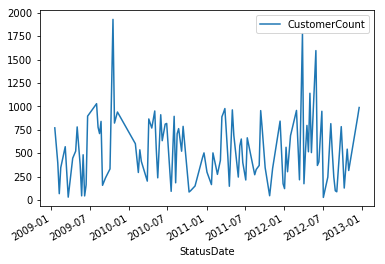

In [34]:
# locで特定のindexのデータが取得できるのでplotしてみる
daily.loc['FL'].plot()
daily.loc['GA'].plot()
daily.loc['NY'].plot()
daily.loc['TX'].plot()

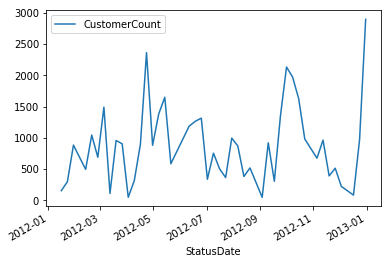

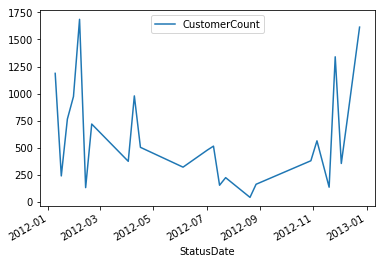

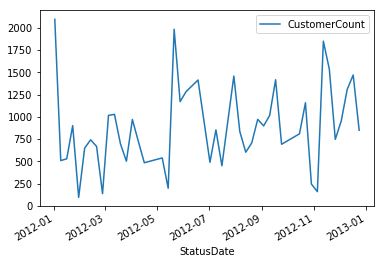

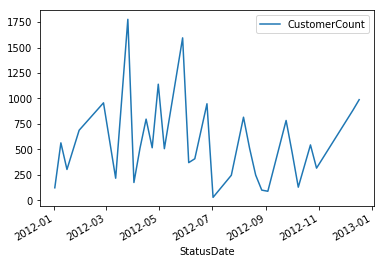

In [35]:
daily.loc['FL']['2012':].plot()
daily.loc['GA']['2012':].plot()
daily.loc['NY']['2012':].plot()
daily.loc['TX']['2012':].plot()

In [38]:
# 次にハズレ値について考えてみる
state_year_month = daily.groupby([daily.index.get_level_values(0),daily.index.get_level_values(1).year,daily.index.get_level_values(1).month])

In [39]:
daily['Lower'] = state_year_month['CustomerCount'].transform(lambda x: x.quantile(q=.25) - (1.5 * x.quantile(q=.75) - x.quantile(q=.25)))
daily['Upper'] = state_year_month['CustomerCount'].transform(lambda x: x.quantile(q=.75) + (1.5 * x.quantile(q=.75) - x.quantile(q=.25)))
daily['Outlier'] = (daily['CustomerCount'] < daily['Lower']) | (daily['CustomerCount'] > daily['Upper'])

In [41]:
daily.head()

CustomerCount    Lower     Upper  Outlier
State StatusDate                                           
FL    2009-01-05            760 -545.125  2557.625    False
      2009-01-12           2538 -545.125  2557.625    False
      2009-01-19            895 -545.125  2557.625    False
      2009-01-26            547 -545.125  2557.625    False
      2009-02-02           1506 -310.250  2320.750    False

In [42]:
all_data = pd.DataFrame(daily['CustomerCount'].groupby(daily.index.get_level_values(1)).sum())
all_data.columns = ['CustomerCount']

In [43]:
year_month = all_data.groupby([lambda x : x.year,lambda x:x.month])

In [44]:
all_data['Max'] = year_month['CustomerCount'].transform(lambda x:x.max())

In [46]:
all_data.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,2519,3351
2009-01-12,3351,3351
2009-01-19,2188,3351
2009-01-26,2301,3351
2009-02-02,2204,2204


In [49]:
# 
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011',end='12/31/2013',freq='A')
bhag = pd.DataFrame(data,index=idx,columns=['BHAG'])
bhag

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [ ]:
combined = pd.concat([all_data,bhag],axis=0)
combined = combined.sort